In [31]:
import os
import zipfile
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Step 1: Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Step 2: Define the zip file path in Google Drive and destination folder
zip_path = "/content/drive/MyDrive/data_DL_CW.zip"  # Update with your zip file path
extract_to = "/content/dataset"

# Step 3: Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

Mounted at /content/drive


In [32]:
train_data_dir = "/content/dataset/Train"  # Corrected path for Train
test_data_dir = "/content/dataset/Test"    # Corrected path for Test

# Verify the contents of Train and Test directories
print("Contents of train directory:", os.listdir(train_data_dir))
print("Contents of test directory:", os.listdir(test_data_dir))


Contents of train directory: ['freshbittergroud', 'rottenapples', 'freshapples', 'freshpotato', 'rottentomato', 'freshoranges', 'freshbanana', 'fresh', 'freshcucumber', 'rottenoranges', 'rottenbittergroud', 'rottencucumber', 'rotten', 'rottenpotato', 'freshtomato', 'freshokra', 'rottencapsicum', 'freshcapsicum', 'rottenbanana', 'rottenokra']
Contents of test directory: ['rottenapples', 'freshapples', 'freshoranges', 'freshpatato', 'freshtamto', 'freshbanana', 'fresh', 'freshcucumber', 'rottenoranges', 'rottencucumber', 'rotten', 'freshokra', 'rottentamto', 'rottenbanana', 'rottenpatato', 'rottenokra']


In [33]:
# Paths to the dataset
train_data_dir = "/content/dataset/Train"  # Corrected path for Train
test_data_dir = "/content/dataset/Test"   # Update based on your extracted folder structure

# Create target folders for fresh and rotten
train_fresh_path = os.path.join(train_path, "fresh")
train_rotten_path = os.path.join(train_path, "rotten")
test_fresh_path = os.path.join(test_path, "fresh")
test_rotten_path = os.path.join(test_path, "rotten")

# Create the directories
os.makedirs(train_fresh_path, exist_ok=True)
os.makedirs(train_rotten_path, exist_ok=True)
os.makedirs(test_fresh_path, exist_ok=True)
os.makedirs(test_rotten_path, exist_ok=True)


In [34]:
import os

# Define the train and test paths
dataset_path = "/content/dataset"  # Adjust this path based on your extracted folder location
train_path = os.path.join(dataset_path, "Train")
test_path = os.path.join(dataset_path, "Test")

# Inspect the train and test directories
print("Inspecting Train Directory:")
for root, dirs, files in os.walk(train_path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)

print("Inspecting Test Directory:")
for root, dirs, files in os.walk(test_path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)


Inspecting Train Directory:
Root: /content/dataset/Train
Directories: ['freshbittergroud', 'rottenapples', 'freshapples', 'freshpotato', 'rottentomato', 'freshoranges', 'freshbanana', 'fresh', 'freshcucumber', 'rottenoranges', 'rottenbittergroud', 'rottencucumber', 'rotten', 'rottenpotato', 'freshtomato', 'freshokra', 'rottencapsicum', 'freshcapsicum', 'rottenbanana', 'rottenokra']
Files: []
----------------------------------------
Root: /content/dataset/Train/freshbittergroud
Directories: []
Files: []
----------------------------------------
Root: /content/dataset/Train/rottenapples
Directories: []
Files: []
----------------------------------------
Root: /content/dataset/Train/freshapples
Directories: []
Files: []
----------------------------------------
Root: /content/dataset/Train/freshpotato
Directories: []
Files: []
----------------------------------------
Root: /content/dataset/Train/rottentomato
Directories: []
Files: []
----------------------------------------
Root: /content/da

In [35]:
# Create fresh and rotten directories
train_fresh_path = os.path.join(train_path, "fresh")
train_rotten_path = os.path.join(train_path, "rotten")
test_fresh_path = os.path.join(test_path, "fresh")
test_rotten_path = os.path.join(test_path, "rotten")

os.makedirs(train_fresh_path, exist_ok=True)
os.makedirs(train_rotten_path, exist_ok=True)
os.makedirs(test_fresh_path, exist_ok=True)
os.makedirs(test_rotten_path, exist_ok=True)

print("Fresh and rotten folders created successfully.")


Fresh and rotten folders created successfully.


In [38]:
import shutil

# Function to move images and handle duplicate filenames
def move_images_to_folders(source_dir, fresh_target, rotten_target):
    for folder_name in os.listdir(source_dir):
        folder_path = os.path.join(source_dir, folder_name)
        print(f"Processing Folder: {folder_name}")
        if os.path.isdir(folder_path):  # Ensure it's a directory
            if "fresh" in folder_name.lower():
                print(f"Moving images from {folder_name} to {fresh_target}")
                for image_name in os.listdir(folder_path):
                    image_path = os.path.join(folder_path, image_name)
                    if os.path.isfile(image_path):
                        # Create a unique filename
                        unique_name = image_name
                        counter = 1
                        while os.path.exists(os.path.join(fresh_target, unique_name)):
                            unique_name = f"{os.path.splitext(image_name)[0]}_{counter}{os.path.splitext(image_name)[1]}"
                            counter += 1
                        # Move the file
                        shutil.move(image_path, os.path.join(fresh_target, unique_name))
            elif "rotten" in folder_name.lower():
                print(f"Moving images from {folder_name} to {rotten_target}")
                for image_name in os.listdir(folder_path):
                    image_path = os.path.join(folder_path, image_name)
                    if os.path.isfile(image_path):
                        # Create a unique filename
                        unique_name = image_name
                        counter = 1
                        while os.path.exists(os.path.join(rotten_target, unique_name)):
                            unique_name = f"{os.path.splitext(image_name)[0]}_{counter}{os.path.splitext(image_name)[1]}"
                            counter += 1
                        # Move the file
                        shutil.move(image_path, os.path.join(rotten_target, unique_name))


In [39]:
# Organize images in the train folder
move_images_to_folders(train_path, train_fresh_path, train_rotten_path)

# Organize images in the test folder
move_images_to_folders(test_path, test_fresh_path, test_rotten_path)


Processing Folder: freshbittergroud
Moving images from freshbittergroud to /content/dataset/Train/fresh
Processing Folder: rottenapples
Moving images from rottenapples to /content/dataset/Train/rotten
Processing Folder: freshapples
Moving images from freshapples to /content/dataset/Train/fresh
Processing Folder: freshpotato
Moving images from freshpotato to /content/dataset/Train/fresh
Processing Folder: rottentomato
Moving images from rottentomato to /content/dataset/Train/rotten
Processing Folder: freshoranges
Moving images from freshoranges to /content/dataset/Train/fresh
Processing Folder: freshbanana
Moving images from freshbanana to /content/dataset/Train/fresh
Processing Folder: fresh
Moving images from fresh to /content/dataset/Train/fresh
Processing Folder: freshcucumber
Moving images from freshcucumber to /content/dataset/Train/fresh
Processing Folder: rottenoranges
Moving images from rottenoranges to /content/dataset/Train/rotten
Processing Folder: rottenbittergroud
Moving i

In [40]:
# Count images in the fresh and rotten folders
print("Train Fresh Images:", len(os.listdir(train_fresh_path)))
print("Train Rotten Images:", len(os.listdir(train_rotten_path)))
print("Test Fresh Images:", len(os.listdir(test_fresh_path)))
print("Test Rotten Images:", len(os.listdir(test_rotten_path)))


Train Fresh Images: 11200
Train Rotten Images: 12419
Test Fresh Images: 3245
Test Rotten Images: 3493


In [41]:
import shutil

# Function to delete subfolders except specified ones
def clean_directory(directory, keep_folders):
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        if os.path.isdir(folder_path) and folder_name not in keep_folders:
            print(f"Deleting folder: {folder_name}")
            shutil.rmtree(folder_path)

# Specify folders to keep
keep_folders = ["fresh", "rotten"]

# Clean train and test directories
clean_directory(train_path, keep_folders)
clean_directory(test_path, keep_folders)

print("Remaining folders in Train Directory:", os.listdir(train_path))
print("Remaining folders in Test Directory:", os.listdir(test_path))


Deleting folder: freshbittergroud
Deleting folder: rottenapples
Deleting folder: freshapples
Deleting folder: freshpotato
Deleting folder: rottentomato
Deleting folder: freshoranges
Deleting folder: freshbanana
Deleting folder: freshcucumber
Deleting folder: rottenoranges
Deleting folder: rottenbittergroud
Deleting folder: rottencucumber
Deleting folder: rottenpotato
Deleting folder: freshtomato
Deleting folder: freshokra
Deleting folder: rottencapsicum
Deleting folder: freshcapsicum
Deleting folder: rottenbanana
Deleting folder: rottenokra
Deleting folder: rottenapples
Deleting folder: freshapples
Deleting folder: freshoranges
Deleting folder: freshpatato
Deleting folder: freshtamto
Deleting folder: freshbanana
Deleting folder: freshcucumber
Deleting folder: rottenoranges
Deleting folder: rottencucumber
Deleting folder: freshokra
Deleting folder: rottentamto
Deleting folder: rottenbanana
Deleting folder: rottenpatato
Deleting folder: rottenokra
Remaining folders in Train Directory: ['

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to Train and Test directories
train_data_dir = "/content/dataset/Train"  # Adjusted to your folder structure
test_data_dir = "/content/dataset/Test"    # Adjusted to your folder structure

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=50,  # Rotate images randomly up to 50 degrees
    width_shift_range=0.2,  # Shift images horizontally by 20% of the width
    height_shift_range=0.2,  # Shift images vertically by 20% of the height
    shear_range=0.6,  # Shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill any gaps created during transformation
)

# Only rescale for testing (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,  # Process images in batches of 32
    class_mode='binary'  # Binary classification: fresh (0) and rotten (1)
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,  # Process images in batches of 32
    class_mode='binary'  # Binary classification: fresh (0) and rotten (1)
)


Found 23619 images belonging to 2 classes.
Found 6738 images belonging to 2 classes.


In [43]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Input layer
inputs = Input(shape=(150, 150, 3))  # Adjust input shape based on image size and channels

# First Conv2D + MaxPooling2D block
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Second Conv2D + MaxPooling2D block
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Third Conv2D block
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten the feature map
x = Flatten()(x)

# Fully connected layer
x = Dense(128, activation='relu')(x)

# Dropout layer
x = Dropout(0.5)(x)

# Output layer (binary classification)
outputs = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display model summary
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator,
    callbacks=[early_stopping]
)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


739/739 ━━━━━━━━━━━━━━━━━━━━ 287s 374ms/step - accuracy: 0.6855 - loss: 0.5749 - val_accuracy: 0.8347 - val_loss: 0.3858
Epoch 2/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 272s 314ms/step - accuracy: 0.8481 - loss: 0.3727 - val_accuracy: 0.8586 - val_loss: 0.3346
Epoch 3/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 234s 315ms/step - accuracy: 0.8608 - loss: 0.3370 - val_accuracy: 0.8755 - val_loss: 0.3039
Epoch 4/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 263s 315ms/step - accuracy: 0.8739 - loss: 0.2994 - val_accuracy: 0.8933 - val_loss: 0.2616
Epoch 5/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 236s 317ms/step - accuracy: 0.8895 - loss: 0.2694 - val_accuracy: 0.8899 - val_loss: 0.2559
Epoch 6/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 262s 316ms/step - accuracy: 0.8928 - loss: 0.2597 - val_accuracy: 0.8909 - val_loss: 0.2377
Epoch 7/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 235s 316ms/step - accuracy: 0.9009 - loss: 0.2367 - val_accuracy: 0.9139 - val_loss: 0.2130
Epoch 8/15
739/739 ━━━━━━━━━━━━━━━━━━━━ 253s 340ms/step - accuracy: 0.8875 - loss: 0.26

In [45]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


211/211 ━━━━━━━━━━━━━━━━━━━━ 28s 130ms/step - accuracy: 0.9410 - loss: 0.1517
Test Loss: 0.1570497751235962
Test Accuracy: 0.9382606148719788


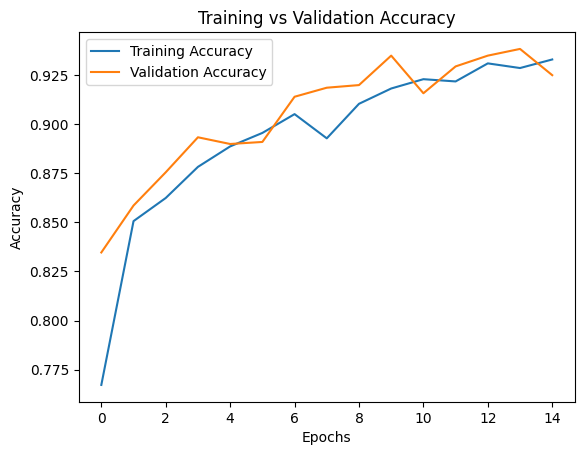

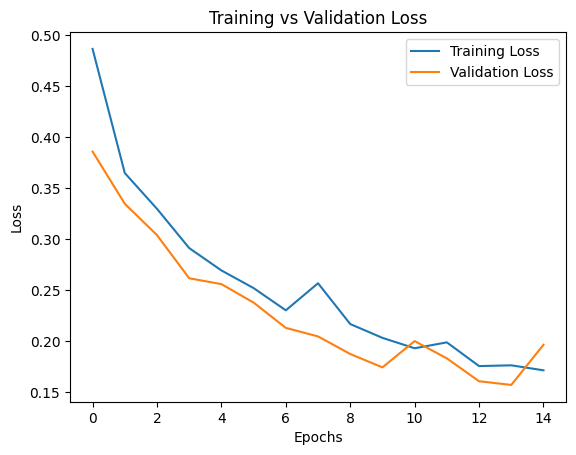

In [46]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [47]:
# Save the trained model
model.save('/content/drive/MyDrive/Colab_Notebooks/deep_learning/Model_fresh_vs_rotten_classifier2.keras')
print("Model saved successfully!")



Model saved successfully!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


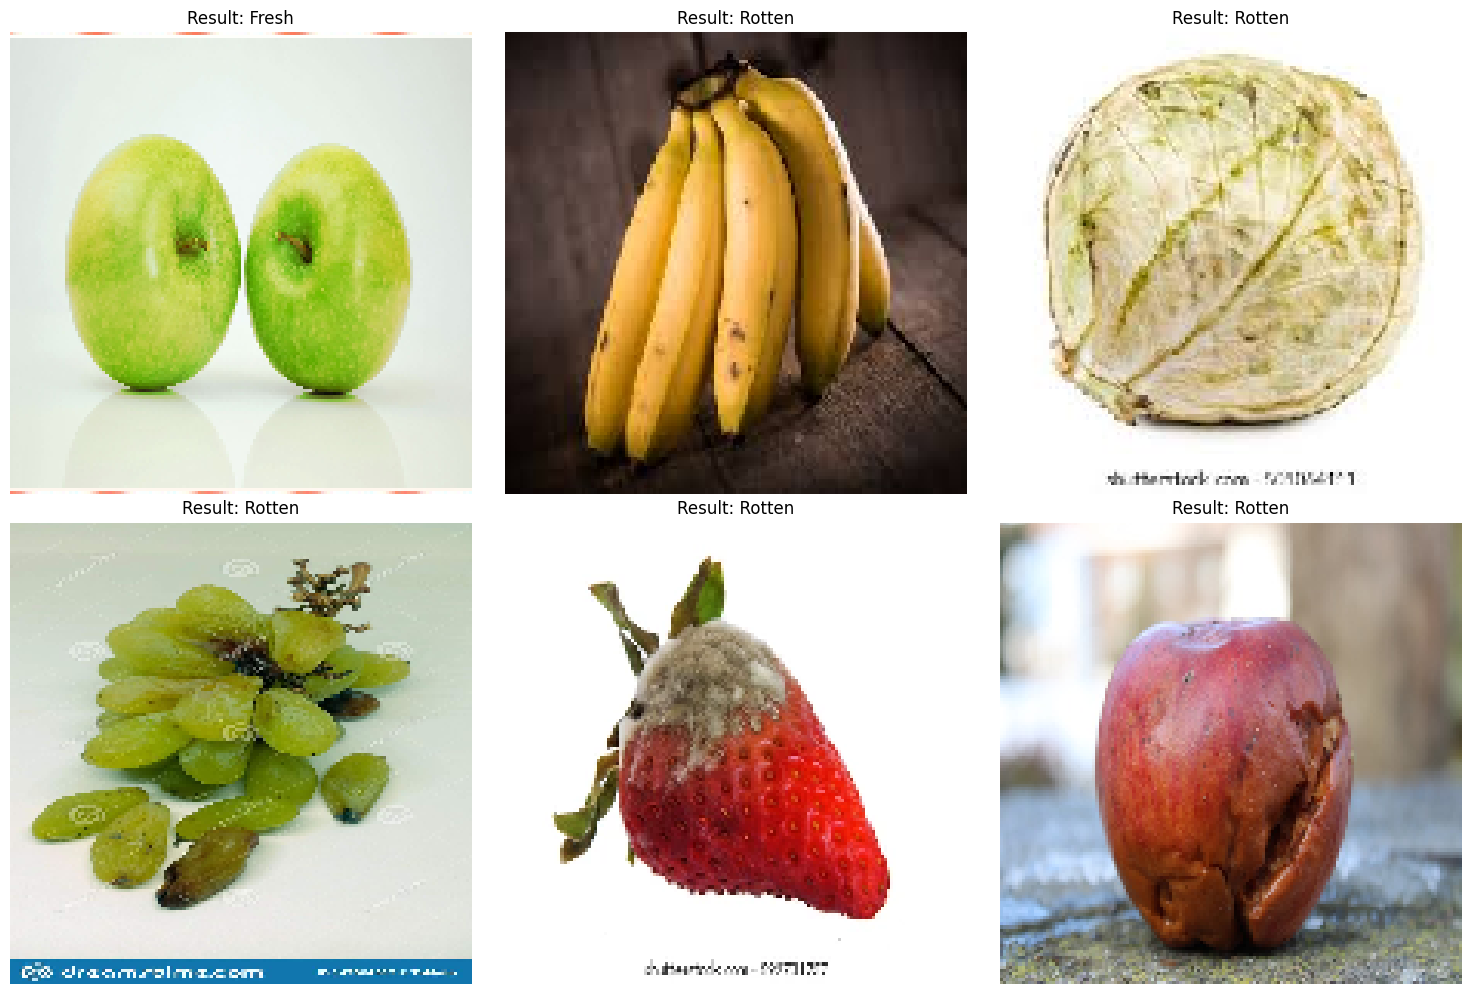

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


# Load the saved model from Google Drive
model_path = "/content/drive/MyDrive/Colab_Notebooks/deep_learning/Model_fresh_vs_rotten_classifier2.keras"  # Update with the correct path
model = load_model(model_path)

# List of image paths (replace with the paths to your images)
image_paths = [
    "/content/F_apple.jpg",  # Replace these paths with actual image paths
    "/content/F_banana.jpeg",
    "/content/R_cabage.jpeg",
    "/content/R_grapes.jpeg",
    "/content/R_strawberry.webp",
    "/content/r_apple.jpg"
]

# Function to preprocess the image and make predictions
def predict_image(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(150, 150))  # Resize to match model input
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict using the model
    prediction = model.predict(img_array)[0][0]  # Get prediction score
    result = "Rotten" if prediction > 0.5 else "Fresh"
    return img, result

# Display predictions for all images
plt.figure(figsize=(15, 10))  # Create a larger figure

for i, image_path in enumerate(image_paths):
    img, result = predict_image(image_path)  # Get image and prediction result

    # Plot the image
    plt.subplot(2, 3, i + 1)  # Arrange images in a 2x3 grid
    plt.imshow(img)  # Directly display the PIL image
    plt.title(f"Result: {result}", fontsize=12)  # Display the prediction result
    plt.axis("off")  # Hide axis

plt.tight_layout()  # Adjust spacing between plots
plt.show()
